In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import optuna

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem2_Cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.shape[0]

569

In [ ]:
df.shape[1]

32

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.describe(percentiles = [0.25,.5,.75,.98,.995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.196195e+07,9.112962e+08,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.279480e+01,2.596840e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,2.931560e+01,3.264440e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.521000e+02,1.754640e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,1.625360e+03,2.048400e+03,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.267240e-01,1.402320e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,2.406880e-01,2.843480e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,3.175280e-01,3.810640e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,1.502920e-01,1.850280e-01,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,2.531880e-01,2.688400e-01,3.040000e-01


In [ ]:
df1 = df.copy()
df1 = df1.drop(['id'], axis = 1)
df1.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


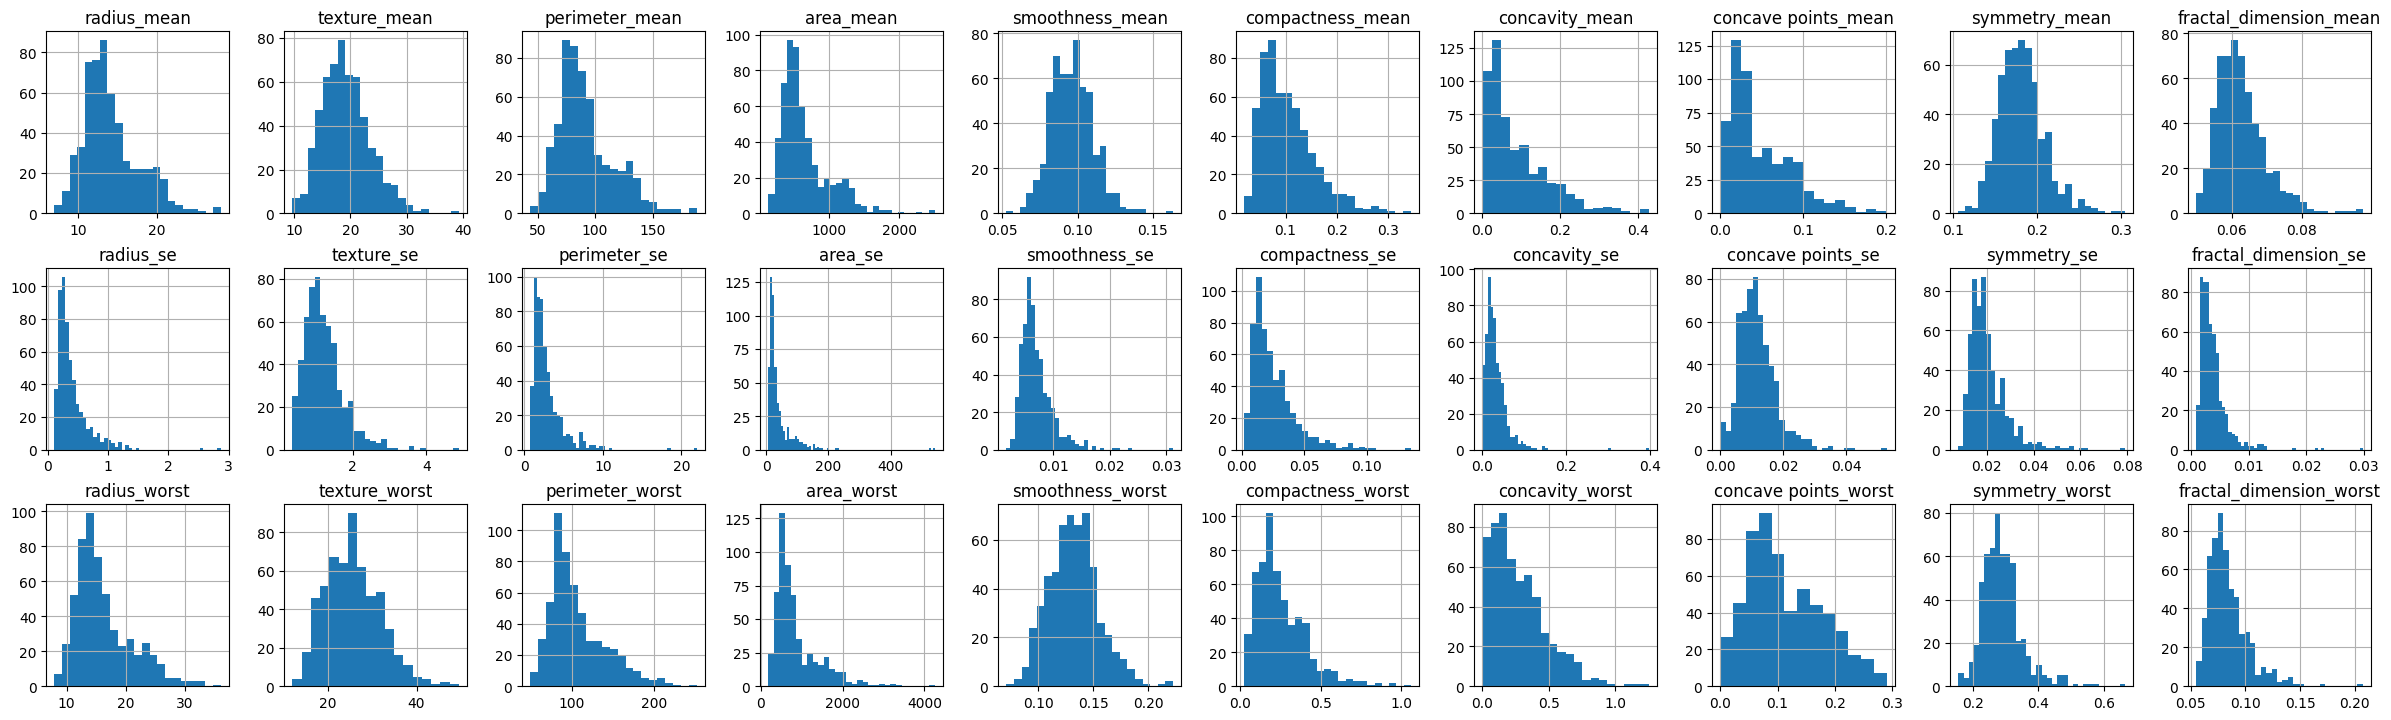

In [ ]:
df1.hist(figsize=(30,30), bins='auto', layout=(10, 10), xlabelsize=10, ylabelsize=10)
plt.show()

In [ ]:
df['diagnosis'].value_counts(normalize = True)

,proportion
diagnosis,
B,0.627417
M,0.372583


In [ ]:
y = np.where(df['diagnosis'] == 'M', 1,0)
X = df.drop(['id', 'diagnosis'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X_Transformed = scaler.transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Transformed, y, test_size = 0.2, random_state = 42)

In [ ]:
#Build model logistic regression
paramslr = {'penalty':['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}

lr = LogisticRegression(solver='liblinear', random_state=42)
CV_lr = GridSearchCV(lr, paramslr, cv=5, n_jobs= 5, verbose= 1)
CV_lr.fit(X_train, y_train)

best_params = CV_lr.best_params_

y_pred = CV_lr.predict_proba(X_test).T[1]
accuracy_score_lr = accuracy_score(y_test, CV_lr.predict(X_test))
f1_score_lr = f1_score(y_test, CV_lr.predict(X_test))
roc_auc_score_lr = roc_auc_score(y_test, y_pred)
print("Best hyperparameters found by GridSearchCV:", best_params)
print('Accuracy score\t', accuracy_score_lr)
print('F1 score\t', f1_score_lr)
print('ROC\t', roc_auc_score_lr)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy score	 0.9736842105263158
F1 score	 0.9647058823529412
ROC	 0.99737962659679


In [ ]:
#Decision Tree Classifier
paramsDTC = {'min_samples_leaf' :[1, 5, 10, 15, 20]}

dct = DecisionTreeClassifier(random_state= 42)
CV_dct = GridSearchCV(dct, paramsDTC, cv=5, n_jobs= 5, verbose= 1)
CV_dct.fit(X_train, y_train)

y_pred = CV_dct.predict_proba(X_test).T[1]
accuracy_score_dct = accuracy_score(y_test, CV_dct.predict(X_test))
f1_score_dct = f1_score(y_test, CV_dct.predict(X_test))
roc_auc_score_dct = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_dct)
print('F1 score\t', f1_score_dct)
print('ROC\t', roc_auc_score_dct)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy score	 0.956140350877193
F1 score	 0.9411764705882353
ROC	 0.9489027186374058


In [ ]:
#Random Forest Classifier
paramsRFC = {'n_estimators': [10, 20, 30, 40, 50], 'min_samples_leaf' :[1, 5, 10, 15, 20]}
rfc = RandomForestClassifier(random_state= 42)
CV_rfc = GridSearchCV(rfc, paramsRFC, cv=5, n_jobs= 5, verbose= 1)
CV_rfc.fit(X_train, y_train)

y_pred = CV_rfc.predict_proba(X_test).T[1]
accuracy_score_rfc = accuracy_score(y_test, CV_rfc.predict(X_test))
f1_score_rfc = f1_score(y_test, CV_rfc.predict(X_test))
roc_auc_score_rfc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_rfc)
print('F1 score\t', f1_score_rfc)
print('ROC\t', roc_auc_score_rfc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy score	 0.9649122807017544
F1 score	 0.9523809523809523
ROC	 0.9942679331804781


In [ ]:
#Adaboost Classifier
paramsabc = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

abc = AdaBoostClassifier(random_state= 42)
CV_abc = GridSearchCV(abc, paramsabc, cv=5, n_jobs= 5, verbose= 1)
CV_abc.fit(X_train, y_train)

y_pred = CV_abc.predict_proba(X_test).T[1]
accuracy_score_abc = accuracy_score(y_test, CV_abc.predict(X_test))
f1_score_abc = f1_score(y_test, CV_abc.predict(X_test))
roc_auc_score_abc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_abc)
print('F1 score\t', f1_score_abc)
print('ROC\t', roc_auc_score_abc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy score	 0.9649122807017544
F1 score	 0.9523809523809523
ROC	 0.9960694398951851


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
#XGBoost Classifier
paramsxgbc = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

xgbc = XGBClassifier(random_state= 42)
CV_xgbc = GridSearchCV(xgbc, paramsxgbc, cv=5, n_jobs= 5, verbose= 1)
CV_xgbc.fit(X_train, y_train)

y_pred = CV_xgbc.predict_proba(X_test).T[1]
accuracy_score_xgbc = accuracy_score(y_test, CV_xgbc.predict(X_test))
f1_score_xgbc = f1_score(y_test, CV_xgbc.predict(X_test))
roc_auc_score_xgbc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_xgbc)
print('F1 score\t', f1_score_xgbc)
print('ROC\t', roc_auc_score_xgbc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy score	 0.9385964912280702
F1 score	 0.9176470588235294
ROC	 0.9780543727481167


In [ ]:
accurary_score = [accuracy_score_lr, accuracy_score_dct, accuracy_score_rfc, accuracy_score_abc, accuracy_score_xgbc]
f1_score = [f1_score_lr, f1_score_dct, f1_score_rfc, f1_score_abc, f1_score_xgbc]
roc_auc_score = [roc_auc_score_lr, roc_auc_score_dct, roc_auc_score_rfc, roc_auc_score_abc, roc_auc_score_xgbc]


TypeError: unsupported operand type(s) for +: 'int' and 'function'

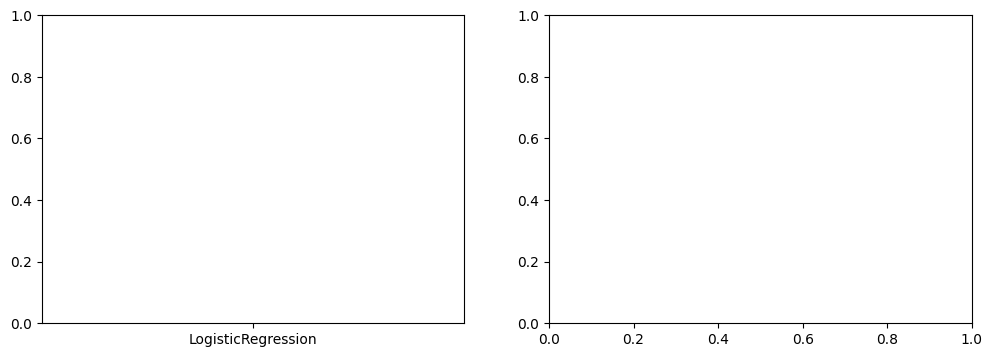

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

# Plot the first chart (Accuracy scores)
axs[0].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], accuracy_score, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Accuracy Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (F1 scores)
axs[1].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], f1_score, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('F1 Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

# Plot the third chart (ROC_AUC scores)
axs[2].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], roc_auc_score, color='red')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('ROC_AUC Score')
axs[2].set_title('ROC_AUC Scores for Different Models')
axs[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

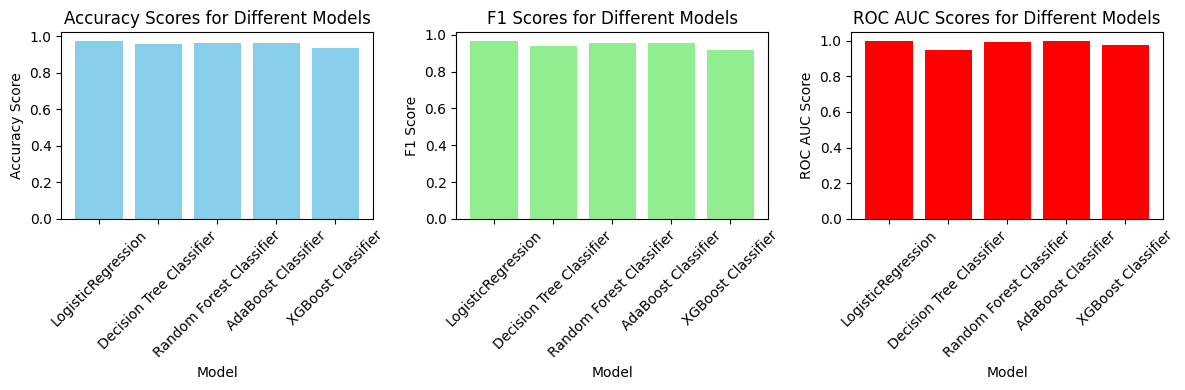

In [ ]:
# Ensure that your variables contain the actual score values
accuracy_score_values = [accuracy_score_lr, accuracy_score_dct, accuracy_score_rfc, accuracy_score_abc, accuracy_score_xgbc]
f1_score_values = [f1_score_lr, f1_score_dct, f1_score_rfc, f1_score_abc, f1_score_xgbc]
roc_auc_score_values = [roc_auc_score_lr, roc_auc_score_dct, roc_auc_score_rfc, roc_auc_score_abc, roc_auc_score_xgbc]

# Plotting the charts
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Update to 3 subplots for accuracy, F1, and ROC AUC

# Plot the first chart (Accuracy scores)
axs[0].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier',
            'AdaBoost Classifier', 'XGBoost Classifier'], accuracy_score_values, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Accuracy Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (F1 scores)
axs[1].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier',
            'AdaBoost Classifier', 'XGBoost Classifier'], f1_score_values, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('F1 Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

# Plot the third chart (ROC AUC scores)
axs[2].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier',
            'AdaBoost Classifier', 'XGBoost Classifier'], roc_auc_score_values, color='red')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('ROC AUC Score')
axs[2].set_title('ROC AUC Scores for Different Models')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Question: Select Feature shall be same between test and training or different?
# Define the objective function
def objective(trial):
    k = trial.suggest_int("k", 1, X_train.shape[1])
    selected_features = SelectKBest(f_classif, k=k).fit_transform(X_train, y_train)

    n_estimators = trial.suggest_int("n_estimators", 10, 100)
    max_depth = trial.suggest_int("max_depth", 2, 10, log=True)

    classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    classifier.fit(selected_features, y_train)

    selected_features_test = SelectKBest(f_classif, k=k).fit_transform(X_test, y_test)
    y_pred = classifier.predict(selected_features_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)

[I 2024-09-27 03:26:22,040] A new study created in memory with name: no-name-2f81007f-f1a0-443d-a76e-13bf6fec99bc
[I 2024-09-27 03:26:22,592] Trial 0 finished with value: 0.9298245614035088 and parameters: {'k': 13, 'n_estimators': 54, 'max_depth': 8}. Best is trial 0 with value: 0.9298245614035088.
[I 2024-09-27 03:26:22,725] Trial 1 finished with value: 0.956140350877193 and parameters: {'k': 19, 'n_estimators': 13, 'max_depth': 2}. Best is trial 1 with value: 0.956140350877193.
